In [3]:
from scipy.special import logit 

In [5]:
%run selbal.py

['//gfs/data/curated_metagenomes_metaphlan2/AsnicarF_2017.csv', '//gfs/data/curated_metagenomes_metaphlan2/ChngKR_2016.csv', '//gfs/data/curated_metagenomes_metaphlan2/FengQ_2015.csv', '//gfs/data/curated_metagenomes_metaphlan2/VogtmannE_2016.csv', '//gfs/data/curated_metagenomes_metaphlan2/YuJ_2015.csv']
['//gfs/data/curated_metagenomes_kraken2/RampelliS_2015.csv', '//gfs/data/curated_metagenomes_kraken2/AsnicarF_2017.csv', '//gfs/data/curated_metagenomes_kraken2/ChngKR_2016.csv', '//gfs/data/curated_metagenomes_kraken2/FengQ_2015.csv', '//gfs/data/curated_metagenomes_kraken2/Heitz-BuschartA_2016.csv', '//gfs/data/curated_metagenomes_kraken2/KarlssonFH_2013.csv', '//gfs/data/curated_metagenomes_kraken2/LeChatelierE_2013.csv', '//gfs/data/curated_metagenomes_kraken2/LiuW_2016.csv', '//gfs/data/curated_metagenomes_kraken2/LomanNJ_2013.csv', '//gfs/data/curated_metagenomes_kraken2/Obregon-TitoAJ_2015.csv', '//gfs/data/curated_metagenomes_kraken2/QinJ_2012.csv', '//gfs/data/curated_metage

In [17]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [26]:
def get_AUC_2(x_train, y_train, x_test, y_test):

    #logisticRegr = LogisticRegression(solver= 'liblinear')
    #logisticRegr.fit(x_train, y_train)

    #Konfidencia scoreok a teszt halmazhoz
    #y_score = logisticRegr.decision_function(x_test)
    print(x_train)
    y_score = sigmoid(x_train)
    print(y_score)
    #ROC görbe számolása
    fpr, tpr, _ = roc_curve(y_train, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title( 'ROC curve')
    plt.legend(loc="lower right")

    return roc_auc

In [6]:
pos_set = np.array([[0.2,0.5,0.05,0.15,0.1],[0.3,0.1,0.15,0.4,0.05]]).T
neg_set = np.array([[0.1,0.3,0.01,0.27,0.31]]).T
bal = balance_for_sets(pos_set, neg_set).reshape(-1, 1)
y = [1,1,0,0,1]

In [15]:
logit(y)

array([ inf,  inf, -inf, -inf,  inf])

[[ 0.89587973]
 [-0.29389333]
 [ 2.15874406]
 [-0.09737204]
 [-1.4779757 ]]
[[0.71010205]
 [0.42705098]
 [0.89648305]
 [0.47567621]
 [0.18573337]]


0.16666666666666666

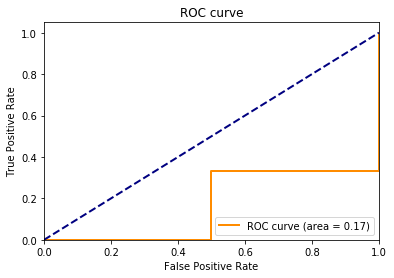

In [27]:
get_AUC_2(bal,y,"","")